# AI 221: Machine Exercise 4 - Handwritten Digits Analysis

<mark style="font-weight: 600; background-color: transparent"> Jhon Mark L. Acopiado

<mark style="font-weight: 600; background-color: transparent"> MEng AI


This exercise focuses on dimensionality reduction and classification techniques applied to the 8x8 handwritten digits dataset from sklearn.

Code Google Drive Link: 

https://drive.google.com/file/d/10Gg_DobSt4CmIJsB0nhQLpzWsw3jsd2T/view?usp=sharing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Dataset Preparation  

This section contains the loading the handwritten digits and showing random samples.

In [3]:
# plot some random digits
def plot_digits(X, y):
    
    random.seed(0)

    rows, cols = 4, 8
    fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
                        subplot_kw=dict(xticks=[], yticks=[]))

    for row in range(rows):
        for col in range(cols):
            n = np.random.randint(1796)+1    # show random samples
            im = ax[row, col].imshow(X[n].reshape((8,8)), cmap=plt.cm.binary)
            ax[row, col].set_title(y[n])
            im.set_clim(0, 16)
    plt.show()

Shape of X: (1797, 64)


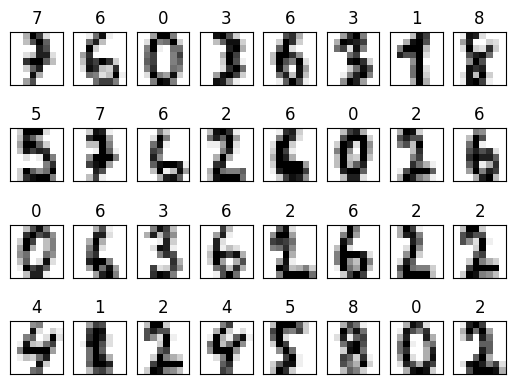

In [4]:
# load the digits dataset, and plot some random digits
X, y = load_digits(return_X_y=True)
print("Shape of X:", X.shape)

plot_digits(X, y)


# Exercises

This section contains the core implementations of Machine Exercise 4 and is subdivided in to 3 subsections:

- Part A: Dimensionality Reduction Visualization
- Part B: Variance Analysis
- Part C: Classification Comparison


## Part A: Dimensionality Reduction Visualization


<mark style="background-color: #fff000"> Item a. Normalize the X data using Standard Scaler. Then, project all the X data into 2 dimensions using 6 dimensionality reduction techniques:  
i. Local Linear Embedding (n_neighbors = 200, random_state = 0)  
ii. t-SNE (perplexity = 50, random_state = 0)   
iii. Isomap (n_neighbors = 200)   
iv. Laplacian Eigenmap (n_neighbors = 200)  
v. Kernel PCA (kernel = ‘rbf’, gamma = 0.01)  
vi. PCA



<mark style="background-color: #fff000">Item a. The points should then be colored according to the digit labels, y. </mark>

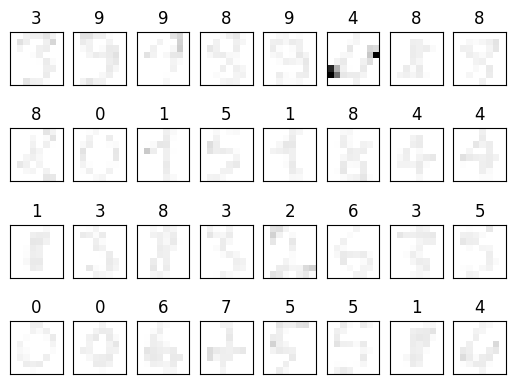

In [5]:
# prompt: Normalize the data using StandardScaler

# Normalize the data using StandardScaler, and plot some random digits
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

plot_digits(X_normalized, y)


In [6]:
# Prompt: Create a function that accepts a parameters reduction_technique, and X data, and returns the transformed data using the specified dimensionality reduction technique.
# The function should support:
#  local_linear_embedding:  Local Linear Embedding (n_neighbors = 200, random_state = 0)
#  t_sne: t-SNE (perplexity = 50, random_state = 0)
#  isomap: Isomap (n_neighbors = 200)
#  laplacian_eigenmap: Laplacian Eigenmap (n_neighbors=200)
#  kernel_pca: Kernel PCA (kernel='rbf', gamma=0.01)
#  pca: PCA

from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, SpectralEmbedding
from sklearn.decomposition import KernelPCA, PCA

def create_dimensionality_reduction_function(reduction_technique, n_components = None):
    if reduction_technique == 'local_linear_embedding':
        model = LocallyLinearEmbedding(n_neighbors=200, n_components=n_components, random_state=0)
    elif reduction_technique == 't_sne':
        model = TSNE(n_components=n_components, perplexity=50, random_state=0)
    elif reduction_technique == 'isomap':
        model = Isomap(n_neighbors=200, n_components=n_components)
    elif reduction_technique == 'laplacian_eigenmap':
        model = SpectralEmbedding(n_neighbors=200, n_components=n_components)
    elif reduction_technique == 'kernel_pca':
        model = KernelPCA(n_components=n_components, kernel='rbf', gamma=0.01)
    elif reduction_technique == 'pca':
        model = PCA(n_components=n_components)
    else:
        raise ValueError("Unsupported reduction technique")
    
    return model


def apply_dimensionality_reduction(model, X):
    return model.fit_transform(X)

In [13]:
reduction_techniques = [
    'local_linear_embedding',
    't_sne',
    'isomap',
    'laplacian_eigenmap',
    'kernel_pca',
    'pca'
]

results = {}
for technique in reduction_techniques:
    model = create_dimensionality_reduction_function(technique, n_components=2)
    results[technique] = apply_dimensionality_reduction(model, X_normalized)


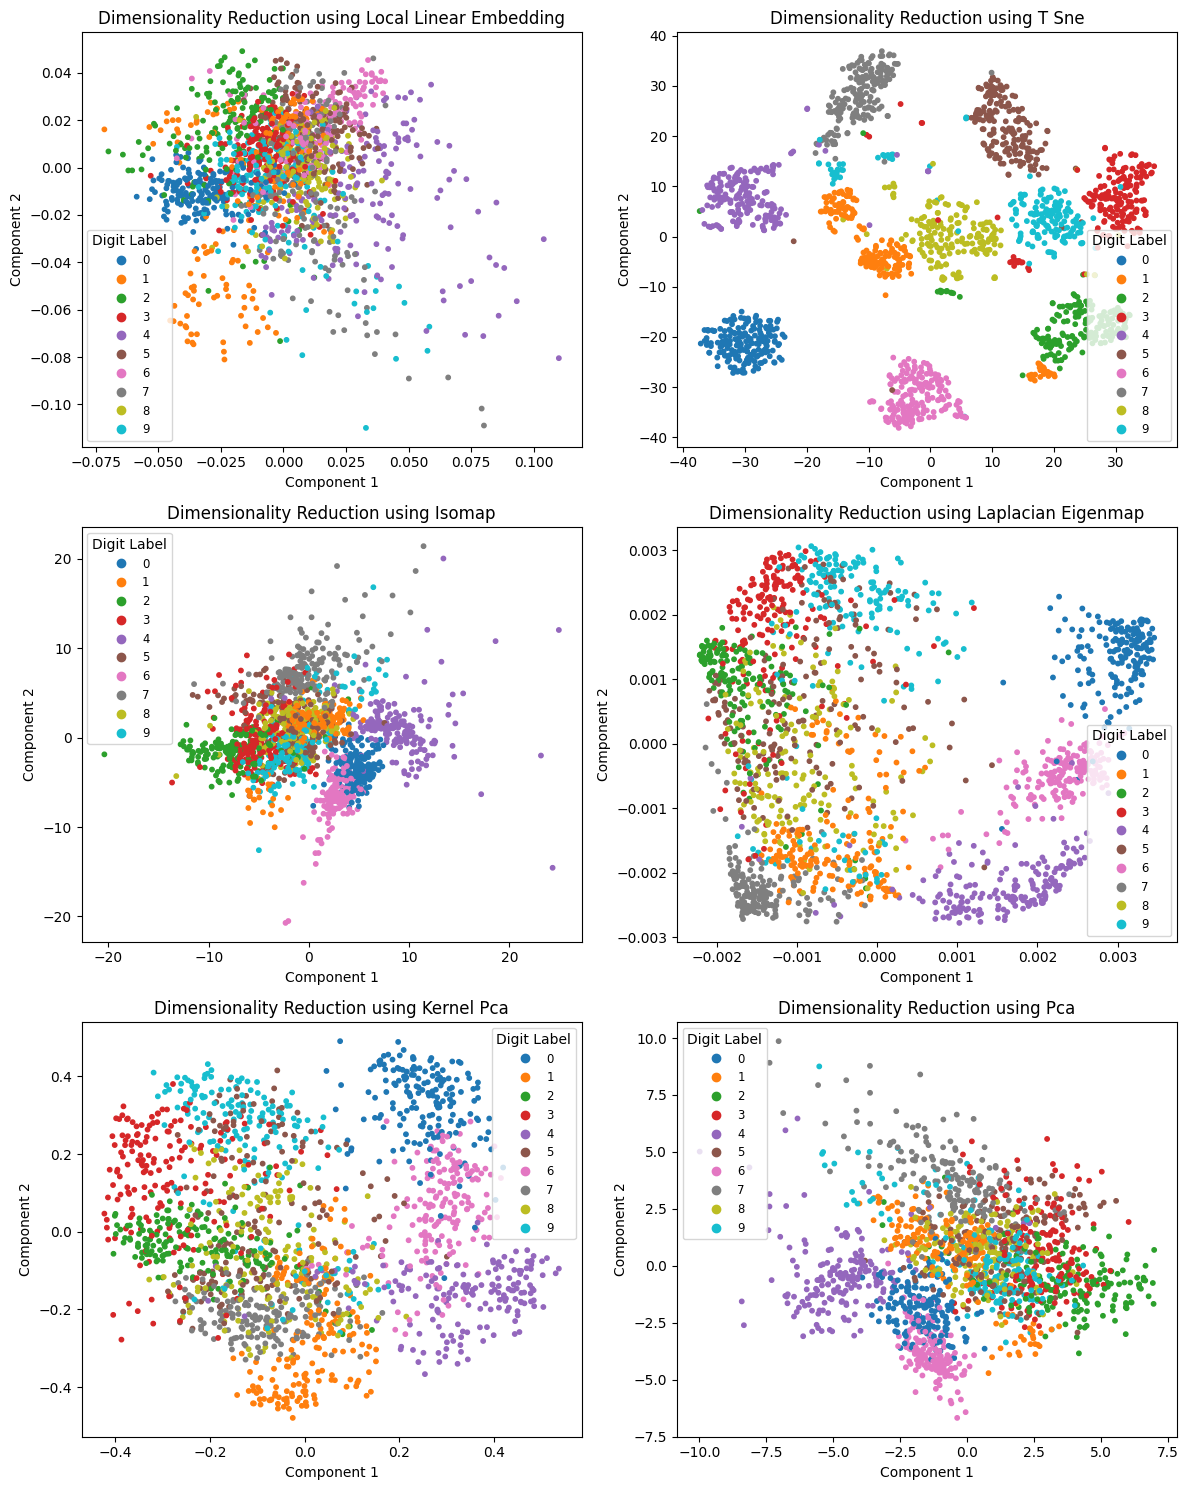

In [14]:
def plot_2d_scatter(data_list, y):
    """
    Displays 2D scatter plots for the given list of transformed data arrays in a single figure.
    
    Parameters:
    data_list (list of tuples): Each tuple contains (X_transformed, title), where:
        X_transformed (numpy.ndarray): 2D array with shape (n_samples, 2) representing the transformed data.
        title (str): Title of the plot.
    y (numpy.ndarray): 1D array with shape (n_samples,) representing the labels.
    """
  

    n_data = len(data_list)
    n_cols = 2
    n_rows = (n_data + 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
    axes = axes.flatten()

    for i, (X_transformed, title) in enumerate(data_list):
        scatter = axes[i].scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.colormaps.get_cmap('tab10'), s=10)
        axes[i].set_title(title)
        axes[i].set_xlabel('Component 1')
        axes[i].set_ylabel('Component 2')
        
        # Add discrete legend
        handles, labels = scatter.legend_elements(prop="colors", num=10, fmt="{x:.0f}")
        axes[i].legend(handles, labels, title="Digit Label", loc="best", fontsize="small")

    # Remove unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


data_list = [(results[technique], f'Dimensionality Reduction using {technique.replace("_", " ").title()}') for technique in reduction_techniques]
plot_2d_scatter(data_list, y)

### Results

<mark style="background-color: #fff000;">Item a. Which of the methods produced clear clusters of data points? </mark>

As shown in the plots above, it is evident that <mark style="background-color: #fff000"> t-sne</mark> have produced clear clusters of data points. 

## Part B: Variance Analysis 


<mark style="background-color: #fff000">Item b. For both KPCA and PCA in the previous item, report the CPV plot and determine the number of principal components needed to retain 95% cumulative percent variance. </mark>

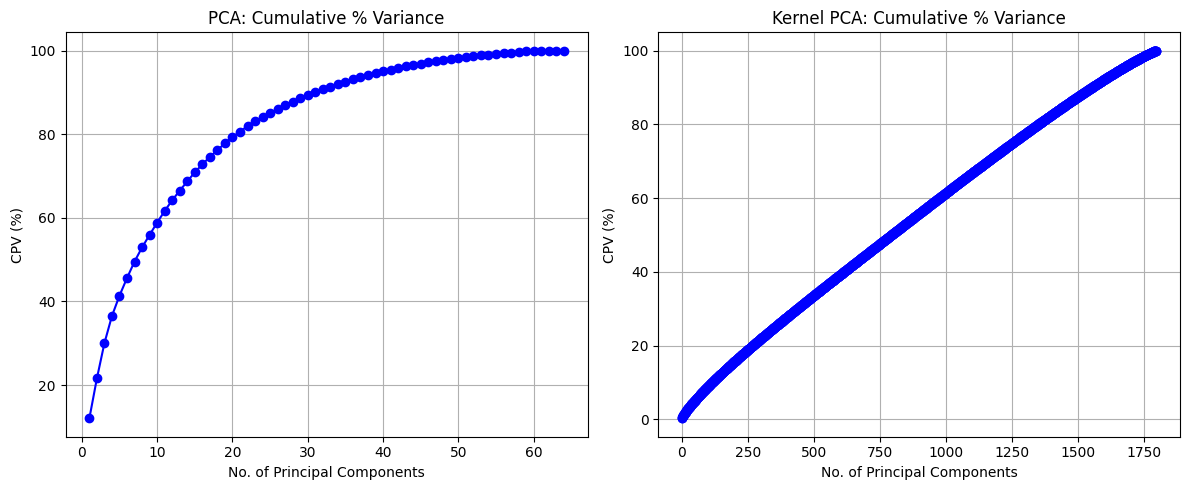

    Technique  Number of Components for 95% Variance
0         PCA                                     40
1  Kernel PCA                                   1663


In [24]:
# Prompt: Create a CPV plot for PCA and Kernel PCA

# Perform PCA to view the CPV plot
pca = create_dimensionality_reduction_function('pca').fit(X_normalized)
var = pca.explained_variance_ratio_
cpv = np.cumsum(var) * 100

kpca = create_dimensionality_reduction_function('kernel_pca').fit(X_normalized)
X_transformed = kpca.fit_transform(X)

# Extract eigenvalues
eigenvalues = kpca.eigenvalues_
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues) * 100

# Plot both CPV graphs in a single figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# PCA CPV plot
axes[0].plot(np.arange(cpv.size) + 1, cpv, 'bo-')
axes[0].set_title('PCA: Cumulative % Variance')
axes[0].set_xlabel('No. of Principal Components')
axes[0].set_ylabel('CPV (%)')
axes[0].grid()

# Kernel PCA CPV plot
axes[1].plot(np.arange(cumulative_variance.size) + 1, cumulative_variance, 'bo-')
axes[1].set_title('Kernel PCA: Cumulative % Variance')
axes[1].set_xlabel('No. of Principal Components')
axes[1].set_ylabel('CPV (%)')
axes[1].grid()

plt.tight_layout()
plt.show()

# Prompt: Determine the number of components required to retain at least 95% variance for both PCA and Kernel PCA.
pca_n_components = np.argmax(cpv >= 95) + 1
kpca_n_components = np.argmax(cumulative_variance >= 95) + 1

variance_95_table = {
    'Technique': ['PCA', 'Kernel PCA'],
    'Number of Components for 95% Variance': [pca_n_components, kpca_n_components]
}
import pandas as pd
print(pd.DataFrame(variance_95_table))

<mark style="background-color: #fff000">Item b. determine the number of principal components needed to retain 95% cumulative percent variance.

To retain 95% cumulative percent variance, PCA and Kernel PCA would need 40, and 1663 components, respectively.

## Part C: Classification Comparison 

### Data Preparation:
- Split data: 70% training, 30% testing
- Ensure stratified sampling by class label, y

### Classification Methods:

1. Method 1: Kernel PCA Pipeline 
   - StandardScaler
   - Kernel PCA (kernel='sigmoid', n_components=40)
   - SVC (default parameters)
   - Report accuracy and F1-score

2. Method 2: LDA Pipeline 
   - StandardScaler
   - LDA (n_components=9)
   - SVC (default parameters)
   - Report accuracy and F1-score
3. Method 3: Baseline SVC 
   - StandardScaler
   - SVC (default parameters)
   - No dimensionality reduction
   - Report accuracy and F1-score


### Data Preparation

Split data into train and test set. Since normalization was localized in part A, I presumed that we will be using the original dataset for part C. 

In [7]:
# Prompt: Split dataset into training and testing sets (70% train, 30% test) using train_test_split with random_state=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### Kernel PCA Pipeline 

<mark style="background-color: #fff000"> Item c.i. Make a pipeline using StandardScaler, Kernel PCA (kernel = ‘sigmoid’, n_components=40), and SVC (default hyper-parameters). Fit the pipeline on the training set, then report the accuracy and F1-score on the test set.

   - StandardScaler
   - Kernel PCA (kernel='sigmoid', n_components=40)
   - SVC (default parameters)
   - Report accuracy and F1-score

In [8]:
# Prompt: Create a pipeline that includes StandardScaler, KernelPCA (kernel='sigmoid', n_components=40), SVC (default parameters), and report accuracy and F1-score on the test set.

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

# Create a pipeline with StandardScaler, KernelPCA, and SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('kernel_pca', KernelPCA(kernel='sigmoid', n_components=40)),
    ('svc', SVC())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 0.9889
F1-score: 0.9889


### LDA Pipeline 
<mark style="background-color: #fff000"> Item c.ii.  Make a pipeline using StandardScaler, Linear Discriminant Analysis (n_components=9), and SVC (default hyper-parameters). Fit the pipeline on the training set, then report the accuracy and F1-score on the test set.

   - StandardScaler  
   - LDA (n_components=9)  
   - SVC (default parameters)  
   - Report accuracy and F1-score  


<mark style="background-color: #fff000">Item c.ii.  Can we extract more than 9 components from LDA? Why or why not? 

   As presented in the lecture slides, since the rank of 𝑺𝑏 (between-class scatter matrix) is less than 𝑝 (number of classes), we can only choose 𝑟 (number of components) to be at most 𝑝−1. This limitation arises because LDA seeks to maximize class separability in a lower-dimensional space, and the maximum number of meaningful dimensions is constrained by the number of classes minus one. Since there are 10 digits (classes), the maximum number of components is 9. 


In [9]:
# Prompt: Create a pipeline that includes StandardScaler, LDA (n_components=9), SVC (default parameters), and report accuracy and F1-score on the test set.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create a pipeline with StandardScaler, LDA, and SVC
lda_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lda', LinearDiscriminantAnalysis(n_components=9)),
    ('svc', SVC())
])

# Fit the pipeline on the training data
lda_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_lda = lda_pipeline.predict(X_test)

# Calculate accuracy and F1-score
accuracy_lda = accuracy_score(y_test, y_pred_lda)
f1_lda = f1_score(y_test, y_pred_lda, average='weighted')

print(f"LDA Pipeline Accuracy: {accuracy_lda:.4f}")
print(f"LDA Pipeline F1-score: {f1_lda:.4f}")


LDA Pipeline Accuracy: 0.9630
LDA Pipeline F1-score: 0.9631


### Baseline SVC

<mark style="background-color: #fff000"> Make a pipeline using StandardScaler and SVC (default hyper-parameters) alone. Fit the pipeline on the training set, then report the accuracy and F1-score on the test set. 

   - StandardScaler
   - SVC (default parameters)
   - No dimensionality reduction
   - Report accuracy and F1-score

In [10]:
# Prompt: Create a pipeline that includes StandardScaler, SVC (default parameters), and report accuracy and F1-score on the test set.
# Create a pipeline with StandardScaler and SVC
svc_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

# Fit the pipeline on the training data
svc_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_svc = svc_pipeline.predict(X_test)

# Calculate accuracy and F1-score
accuracy_svc = accuracy_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc, average='weighted')

print(f"SVC Pipeline Accuracy: {accuracy_svc:.4f}")
print(f"SVC Pipeline F1-score: {f1_svc:.4f}")


SVC Pipeline Accuracy: 0.9833
SVC Pipeline F1-score: 0.9833


### Comparison of Accuracy and F1-Score on Test Set



In [11]:

# Create a dictionary to store the results
results_summary = {
    "Pipeline": ["KernelPCA + SVC", "LDA + SVC", "SVC (default)"],
    "Accuracy": np.round(np.array([accuracy, accuracy_lda, accuracy_svc]) * 100, 2),
    "F1-score": [f1, f1_lda, f1_svc]
}

# Convert the dictionary to a DataFrame
results_df = pd.DataFrame(results_summary)

# Display the table
print(results_df)

          Pipeline  Accuracy  F1-score
0  KernelPCA + SVC     98.89  0.988902
1        LDA + SVC     96.30  0.963146
2    SVC (default)     98.33  0.983342


<mark style="background-color: #fff000"> Item c.iii. Which of the three methods had the best test performance for classification? Explain. </mark>

<mark style="background-color: #fff000">KernelPCA + SVC.

From The above results, it is evident that adding dimensionality reduction prior to SVC may increase the performance of the model. In this case, adding kernelPCA before SVC has slightly increase the test performance. However, it was not the case for all, as proof that adding LDA dimensionality reduction prior to SVC has not yield better performance than the baseline SVC model alone. 

Nevertheless, the traded-off I see when using LDA is that it uses fewer number of features, thus reducing the data to process on SVC (or any ML model we choose). LDA only used 9 components, which are used as features for SVC model, compared to 40 features with Kernel PCA and 64 features without dimensionality reduction. 


## Other Dimensionality Reduction Methods + SVC  

In [23]:

from sklearn.preprocessing import FunctionTransformer

classification_techniques = [
    'local_linear_embedding',
    'isomap',
    'laplacian_eigenmap',
    'kernel_pca',
    'pca'
]

results = {}
for technique in classification_techniques:
    model = create_dimensionality_reduction_function(technique, n_components=40)
    if technique == 'laplacian_eigenmap':
        # Wrap SpectralEmbedding's fit_transform method
        model = FunctionTransformer(model.fit_transform, validate=False)
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        (technique, model),
        ('svc', SVC())
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    results[technique + '+ SVC'] = {
        'accuracy': round(accuracy, 4) * 100,
        'f1_score': round(f1, 4) * 100
    }
print(pd.DataFrame(results).T)

                             accuracy  f1_score
local_linear_embedding+ SVC     97.78     97.77
isomap+ SVC                     98.15     98.15
laplacian_eigenmap+ SVC         26.85     22.66
kernel_pca+ SVC                 97.78     97.78
pca+ SVC                        98.33     98.33


None of the above combinatio has exceeded KernelPCA with sigmoid kernel. 